In [240]:
# Machine Learning Analysis: Predicting PCE
# Predicting Power Conversion Efficiency (PCE) of materials based on physical and chemical features.
# Goal: Build regression models to estimate PCE from features like thickness, band gap,
# electron affinity, doping concentration, and defect density

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, root_mean_squared_error, r2_score
from functools import partial
from sklearn.inspection import PartialDependenceDisplay


In [242]:
## load the data
df = pd.read_csv("data.csv")

In [243]:

# prepocessing and cleaning


In [244]:
df.head()

,SN,thickness,defect,band_gap,electron_affinity,doping,pce
0,1,0.7,10000000000000,1.41,3.555,1000000000000000,20.1292728
1,2,0.7,10000000000000,1.41,3.555,1E+016,20.2300126
2,3,0.7,10000000000000,1.41,3.555,1E+017,20.2786026
3,4,0.7,10000000000000,1.41,3.555,1E+018,20.4586816
4,5,0.7,10000000000000,1.41,3.655,1000000000000000,22.8840414


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SN                 2161 non-null   object
 1   thickness          2161 non-null   object
 2   defect             2161 non-null   object
 3   band_gap           2161 non-null   object
 4   electron_affinity  2161 non-null   object
 5   doping             2161 non-null   object
 6   pce                2161 non-null   object
dtypes: object(7)
memory usage: 118.4+ KB


In [246]:
df = df.apply(pd.to_numeric, errors='coerce')


In [247]:
df.describe()

,SN,thickness,defect,band_gap,electron_affinity,doping,pce
count,2160.000000,2160.000000,2.160000e+03,2160.000000,2160.000000,2.160000e+03,2160.000000
mean,600.500000,0.900000,2.777500e+15,1.510000,3.755000,2.777500e+17,19.194824
std,398.087031,0.258259,4.188812e+15,0.081669,0.141454,4.188812e+17,2.438354
min,1.000000,0.500000,1.000000e+13,1.410000,3.555000,1.000000e+15,11.703817
25%,270.750000,0.700000,7.750000e+13,1.410000,3.655000,7.750000e+15,17.525714
50%,540.500000,0.900000,5.500000e+14,1.510000,3.755000,5.500000e+16,19.266821
75%,900.250000,1.100000,3.250000e+15,1.610000,3.855000,3.250000e+17,20.908662
max,1440.000000,1.300000,1.000000e+16,1.610000,3.955000,1.000000e+18,25.317546


In [248]:
df = df.drop(columns=['SN'])

In [249]:
df.thickness

0       0.7
1       0.7
2       0.7
3       0.7
4       0.7
       ... 
2158    1.3
2159    1.3
2160    1.3
2161    1.3
2162    1.3
Name: thickness, Length: 2163, dtype: float64

In [250]:
df.defect

0       1.000000e+13
1       1.000000e+13
2       1.000000e+13
3       1.000000e+13
4       1.000000e+13
            ...     
2158    1.000000e+16
2159    1.000000e+16
2160    1.000000e+16
2161    1.000000e+16
2162    1.000000e+16
Name: defect, Length: 2163, dtype: float64

In [251]:
df.band_gap

0       1.41
1       1.41
2       1.41
3       1.41
4       1.41
        ... 
2158    1.61
2159    1.61
2160    1.61
2161    1.61
2162    1.61
Name: band_gap, Length: 2163, dtype: float64

In [252]:
df.electron_affinity

0       3.555
1       3.555
2       3.555
3       3.555
4       3.655
        ...  
2158    3.855
2159    3.955
2160    3.955
2161    3.955
2162    3.955
Name: electron_affinity, Length: 2163, dtype: float64

In [253]:
df.doping

0       1.000000e+15
1       1.000000e+16
2       1.000000e+17
3       1.000000e+18
4       1.000000e+15
            ...     
2158    1.000000e+18
2159    1.000000e+15
2160    1.000000e+16
2161    1.000000e+17
2162    1.000000e+18
Name: doping, Length: 2163, dtype: float64

In [254]:
df.pce

0       20.129273
1       20.230013
2       20.278603
3       20.458682
4       22.884041
          ...    
2158    21.293994
2159    18.527718
2160    19.421001
2161    20.305046
2162    21.390849
Name: pce, Length: 2163, dtype: float64

In [255]:
df.isna().sum()

thickness            3
defect               3
band_gap             3
electron_affinity    3
doping               3
pce                  3
dtype: int64

In [256]:
df = df.dropna()
df.isna().sum()

thickness            0
defect               0
band_gap             0
electron_affinity    0
doping               0
pce                  0
dtype: int64

In [257]:

# EDA - Exploratory Data Analysis


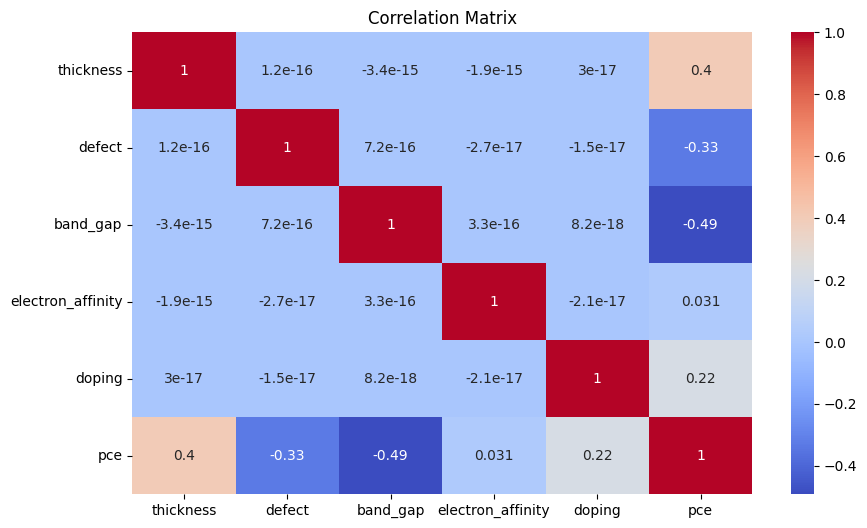

In [258]:
## show correlation matrix for depicting relation between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("plots/correlation-matrix-1.png")
plt.show()

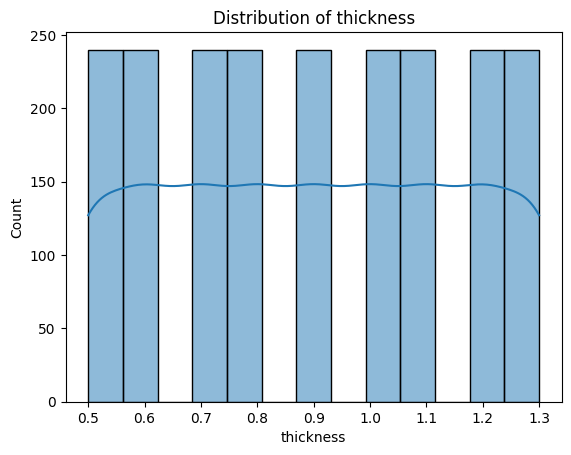

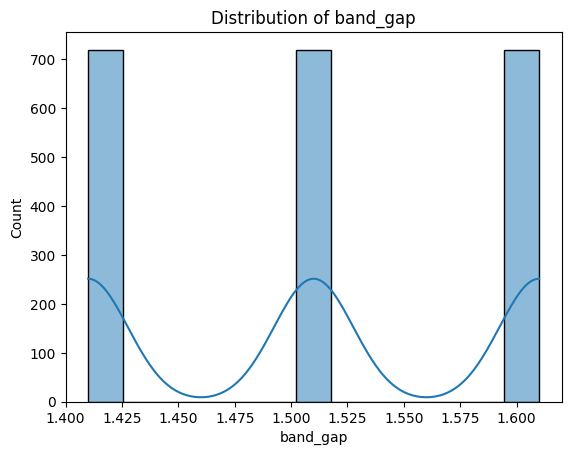

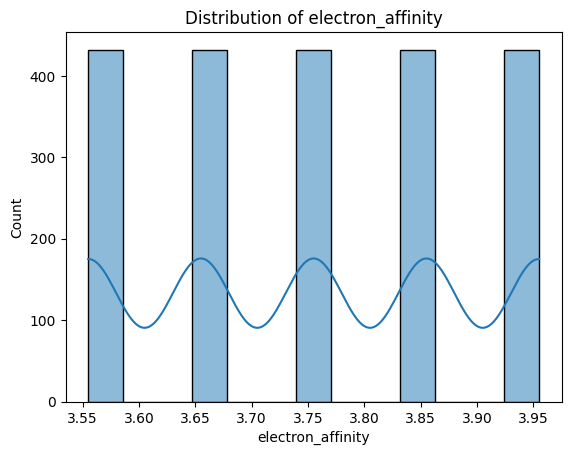

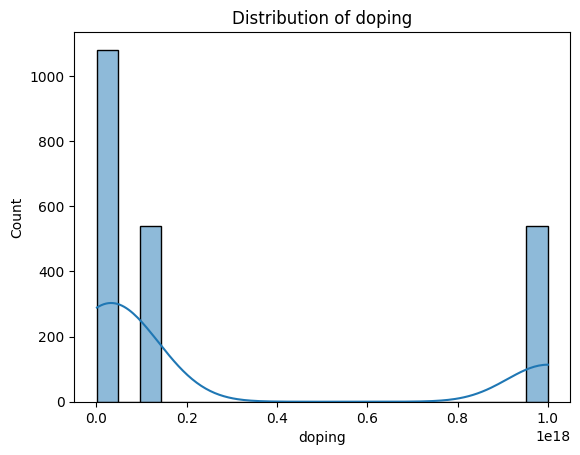

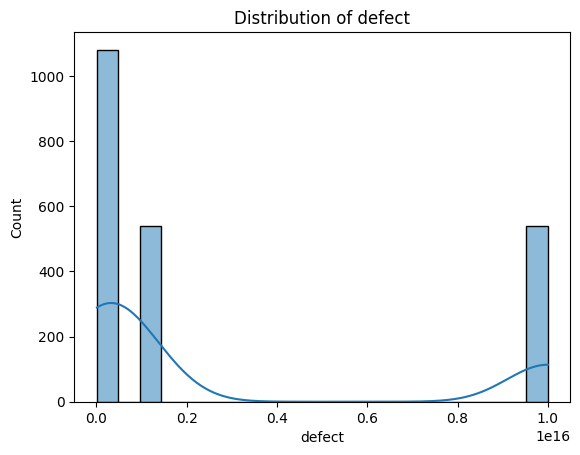

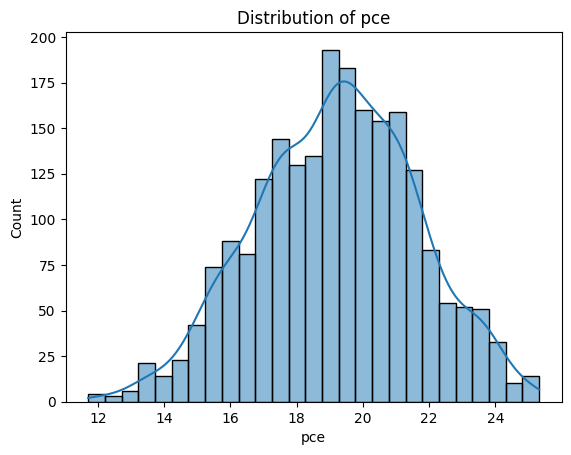

In [259]:
## depicts distribution of the features
for col in ['thickness', 'band_gap','electron_affinity', 'doping', 'defect', 'pce']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig("plots/distribution-" + col + ".png")
    plt.show()

In [260]:
## create new features log_doping and log_defect to search for more normalize features
df['log_doping'] = np.log10(df['doping'])
df['log_defect'] = np.log10(df['defect'])

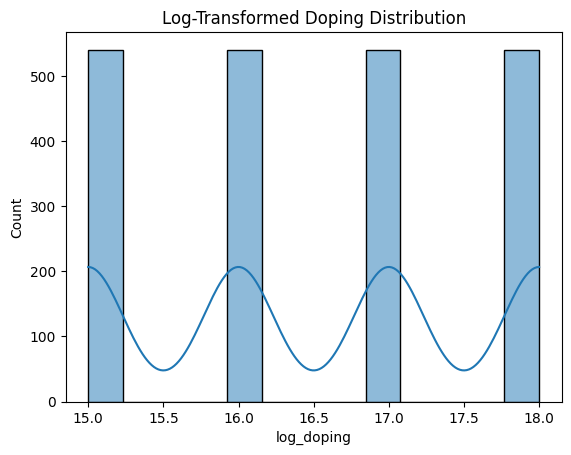

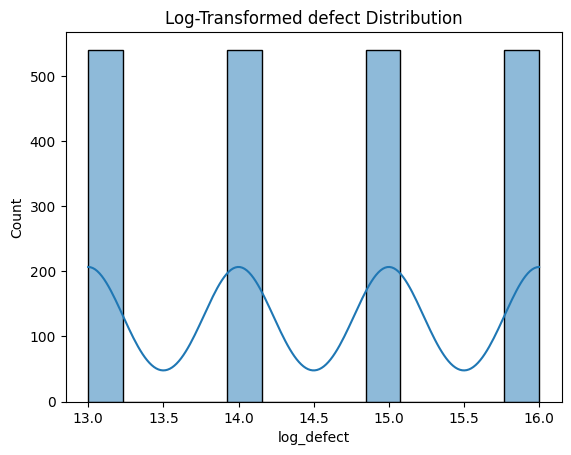

In [261]:
## depicts distribution of log_doping, log_defect
sns.histplot(df['log_doping'], kde=True)
plt.title("Log-Transformed Doping Distribution")
plt.savefig("plots/distribution-log-doping.png")
plt.show()

sns.histplot(df['log_defect'], kde=True)
plt.title("Log-Transformed defect Distribution")
plt.savefig("plots/distribution-log-defect.png")
plt.show()

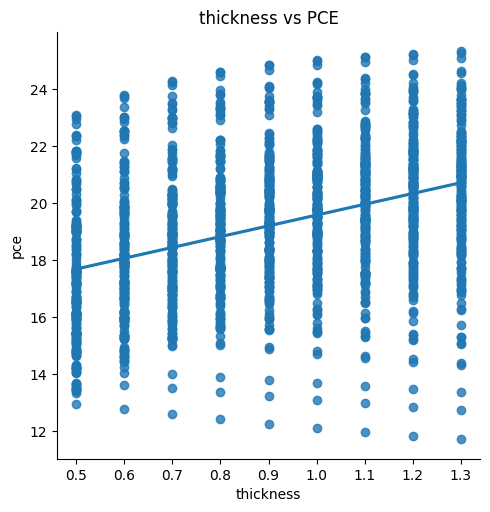

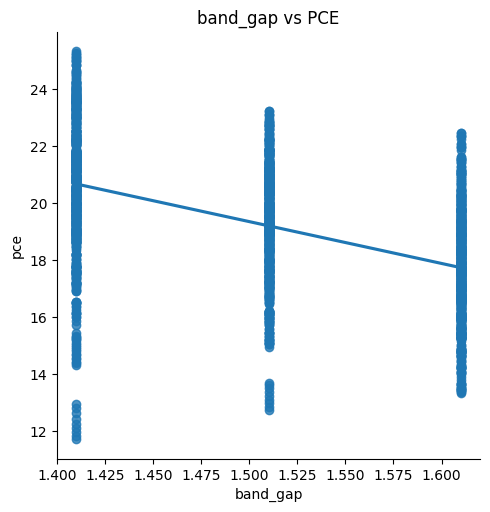

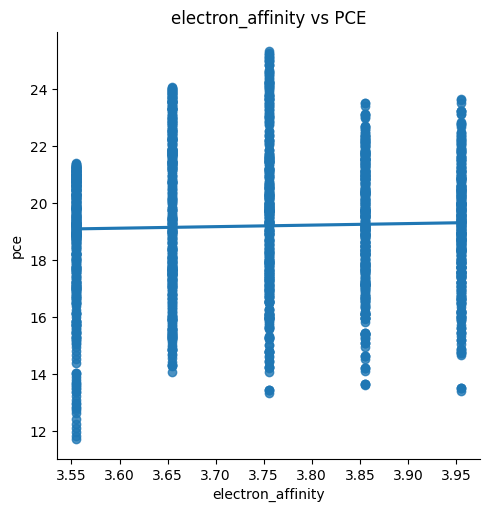

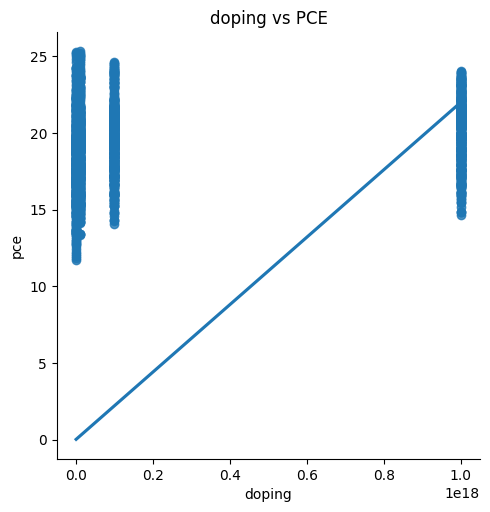

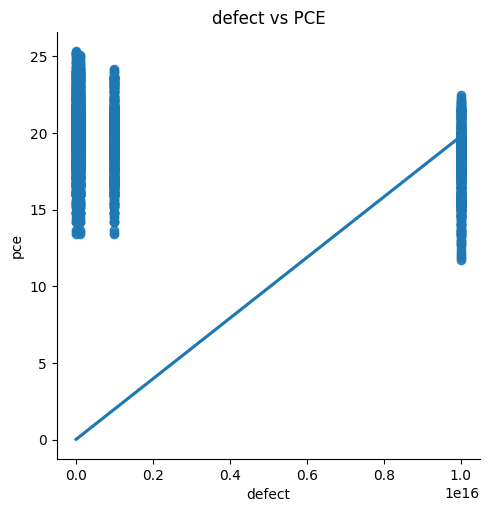

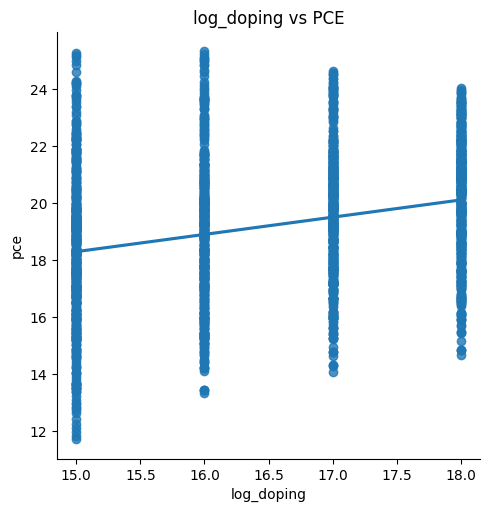

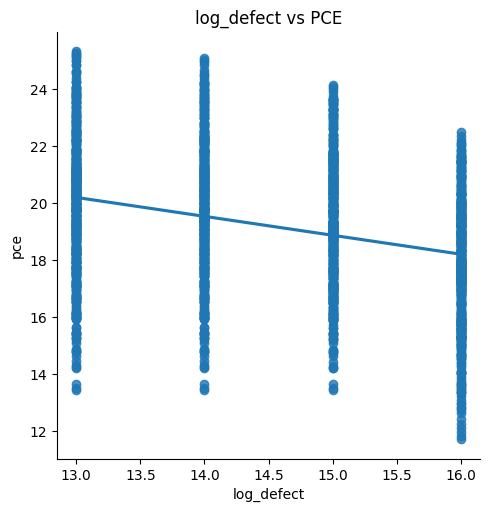

In [262]:
## depicts relation of each features with pce
for feature in ['thickness', 'band_gap', 'electron_affinity', 'doping', 'defect', 'log_doping', 'log_defect']:
    sns.lmplot(x=feature, y='pce', data=df, ci=None)
    plt.title(f'{feature} vs PCE')
    plt.savefig("plots/pce-vs" + feature + ".png")
    plt.show()

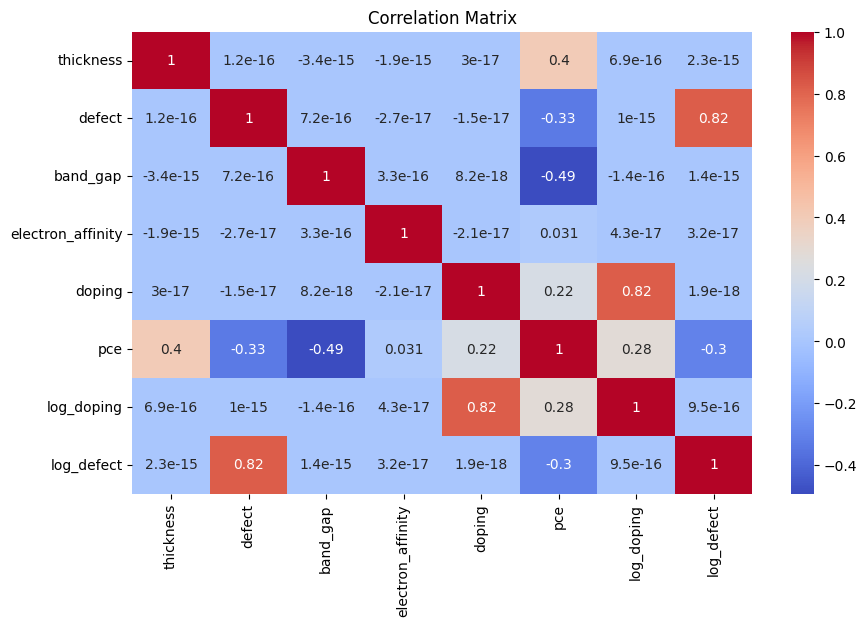

In [263]:
## corelation matrix with log_doping and log_defect
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("plots/correlation-matrix-2.png")
plt.show()

In [264]:

# Modelling


In [265]:
### define Features and target
X = df[['thickness', 'band_gap', 'electron_affinity', 'doping', 'defect']]
y = df['pce']

In [266]:
### test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [267]:
### define regression model 
random_forest_model = RandomForestRegressor(n_estimators=200, random_state=42)

In [268]:
## K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Scorers
rmse_scorer = make_scorer(root_mean_squared_error)  # RMSE

random_forest_model_rmse = cross_val_score(random_forest_model, X_train, y_train, cv=kf, scoring=rmse_scorer)
random_forest_model_r2 = cross_val_score(random_forest_model, X_train, y_train, cv=kf, scoring='r2')


print("\nRandom Forest Regression:")
print("  RMSE (per fold):", random_forest_model_rmse)
print("  Mean RMSE:", np.mean(random_forest_model_rmse))
print("  R2 (per fold):", random_forest_model_r2)
print("  Mean R2:", np.mean(random_forest_model_r2))


Random Forest Regression:
  RMSE (per fold): [0.28283345 0.32007955 0.35847553 0.32847316 0.27780387]
  Mean RMSE: 0.3135331128806485
  R2 (per fold): [0.98603596 0.98222863 0.98047921 0.97990717 0.98775423]
  Mean R2: 0.9832810406863851


In [269]:
### Fit on full training data and evaluate on test set
random_forest_model.fit(X_train, y_train)
test_score = random_forest_model.score(X_test, y_test)
print("R2 score (on holdout test set):", test_score)

R2 score (on holdout test set): 0.9852542718016152


In [270]:
## plot how the model works on unseen data
### predict on the holded test data
y_pred = random_forest_model.predict(X_test)

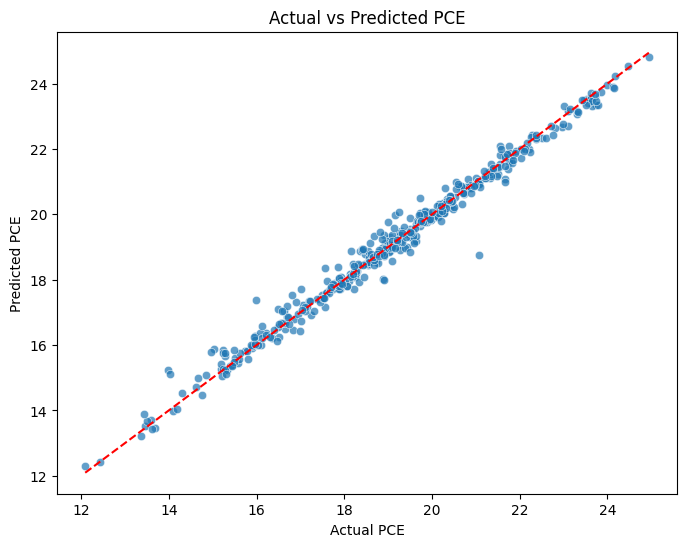

In [271]:
### plot actual value vs predicted value
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

plt.xlabel('Actual PCE')
plt.ylabel('Predicted PCE')
plt.title('Actual vs Predicted PCE')
plt.savefig("plots/actual-vs-predicted.png")
plt.show()

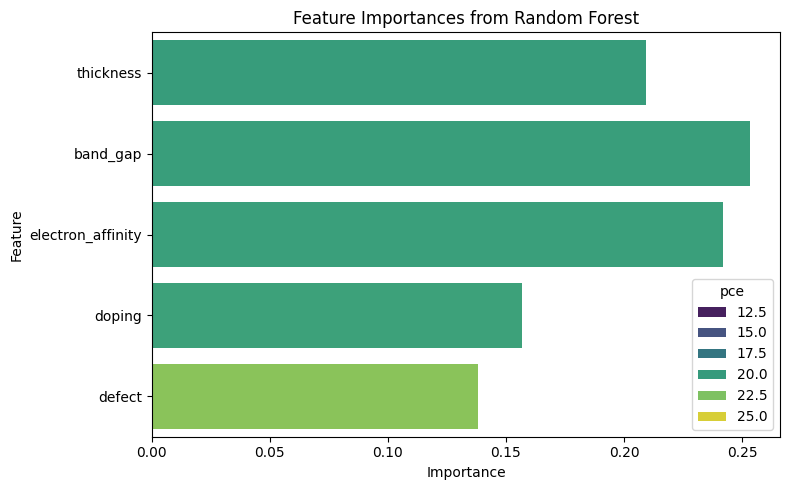

In [272]:
## inspection
### feature imortance - the effect of the features on the predicted value
importances = random_forest_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue=y)
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.savefig("plots/feature-importance.png")
plt.show()

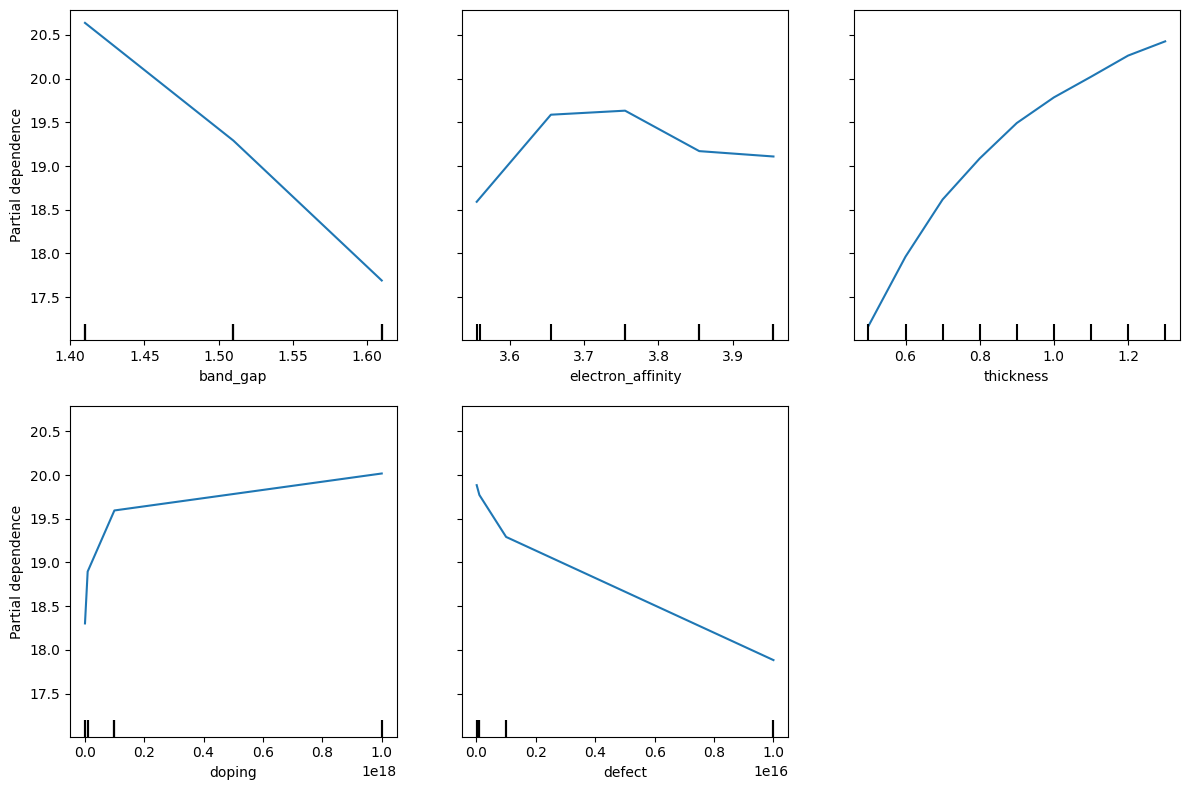

In [273]:
## partial dependece of the fetaures
### other features are kept constant
top_features = importance_df['Feature']
fig, ax = plt.subplots(figsize=(12, 8))  # Bigger figure size

PartialDependenceDisplay.from_estimator(random_forest_model, X_train, top_features, kind="average", grid_resolution=50, ax=ax)
plt.tight_layout()
plt.savefig("plots/partial-dependence.png")
plt.show()


In [274]:
## train model on full data for the final model
random_forest_model.fit(X,y)

### predict on new data
new_data = pd.DataFrame([{
    'thickness': 0.7,
    'band_gap': 1.41,
    'electron_affinity': 3.555,
    'defect': 1e13,
    'doping': 1e16,
}])
new_data = new_data[X.columns]

predicted_value = random_forest_model.predict(new_data)
print("The predicted PCE: ", predicted_value)

The predicted PCE:  [20.16633281]


In [275]:

# Summarize findings:
# Random Forest effectively models nonlinear relationships in data
# Log transform optional depending on model choice